In [1]:
import random
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

import logging
from utils import *
from Lib.DataLoader import DataLoader

logging.basicConfig(level=logging.ERROR)

def load_data(file_path, num_fields, separator, skip_title, cls_col, start_feature_col, end_feature_col):
    dl = DataLoader()
    lines = dl.load_data_lines(file_path, num_fields=num_fields, separator=separator, skip_title=skip_title, shuffle=True)
    train_lines, val_lines = dl.split_data_by_cls_num(lines, cls_col)
    train_X = [[int(e) for e in l[start_feature_col:end_feature_col+1]] for l in train_lines]
    train_y = [int(l[cls_col]) for l in train_lines]
    val_X = [[int(e) for e in l[start_feature_col:end_feature_col+1]] for l in val_lines]
    val_y = [int(l[cls_col])for l in val_lines]
    val_id = [l[0:2] for l in val_lines]

    return train_X, train_y, val_X, val_y, val_id

def write_pred_result(val_id, val_y, prediction):
    with open(r'data/svm_r1.txt', 'w') as f:
        for (id, dt), y, y_ in zip(val_id, val_y, prediction):
            f.write('%s,%s,%s,%s\n' % (id, dt, y, y_))



In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

font = FontProperties(fname="SimHei.ttf", size=14)
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        print(cm)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("显示百分比：")
#         np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
    else:
        cm_ = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
#         print('显示具体数字：')
#         print(cm_)
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本问题，如果不加下面这行代码，则绘制的混淆矩阵上下只能显示一半，有的版本的matplotlib不需要下面的代码，分别试一下即可
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontproperties=font)
    plt.xlabel('Predicted label', fontproperties=font)
    plt.show()


6
4, total num: 637, train num: 510
1, total num: 695, train num: 556
0, total num: 602, train num: 482
2, total num: 505, train num: 404
7, total num: 21, train num: 17
5, total num: 300, train num: 240
6, total num: 299, train num: 239
3, total num: 227, train num: 182
8, total num: 58, train num: 46
9, total num: 112, train num: 90
准确率: 79.57%


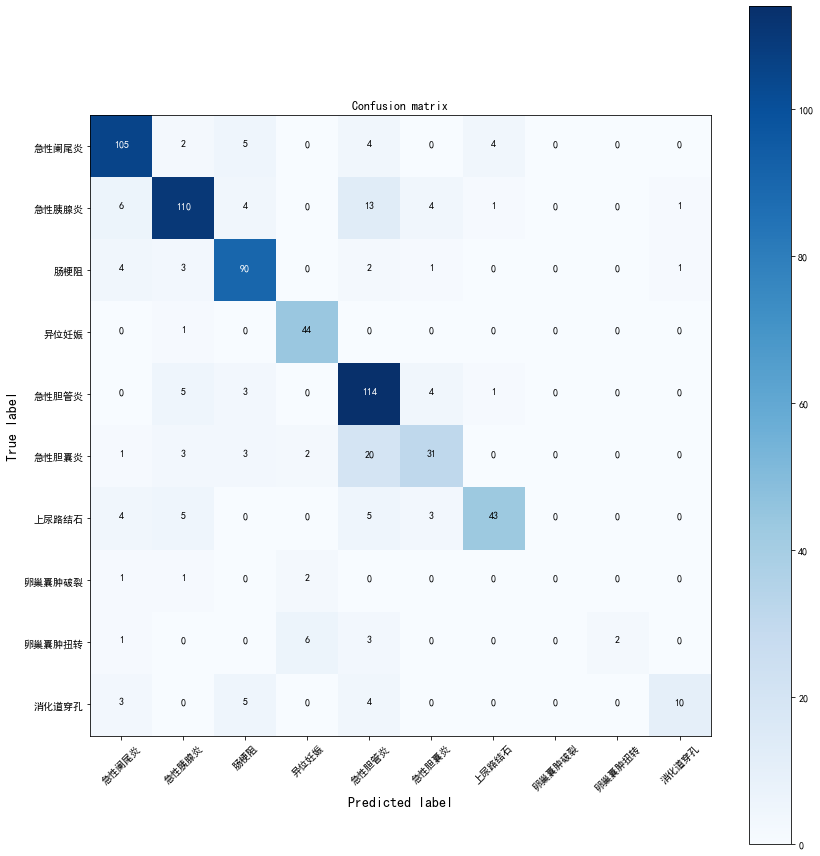

In [6]:
# # 全量数据，准确率：76% ~ 79%
train_X, train_y, val_X, val_y, val_id = load_data(r'data/疾病诊断拟合_全特征.txt', num_fields=171, separator='	',
    skip_title=True, cls_col=2, start_feature_col=3, end_feature_col=170)

# # 临床特征，非模型，无人工，准确率：47.25%
# train_X, train_y, val_X, val_y, val_id = load_data(r'data/疾病诊断拟合_临床_非模型_无人工.txt', num_fields=93, separator='	',
    #     skip_title=True, cls_col=2, start_feature_col=3, end_feature_col=92)

# # 临床特征，准确率：67.83%
# train_X, train_y, val_X, val_y, val_id = load_data(r'data/疾病诊断拟合_临床.txt', num_fields=121, separator='	',
#     skip_title=True, cls_col=2, start_feature_col=3, end_feature_col=120)

# # # 实验室特征，准确率：55.94%
# train_X, train_y, val_X, val_y, val_id = load_data(r'data/疾病诊断拟合_实验室.txt', num_fields=21, separator='	',
#     skip_title=True, cls_col=2, start_feature_col=3, end_feature_col=20)

# # 影像学特征，准确率：67.39%
# train_X, train_y, val_X, val_y, val_id = load_data(r'data/疾病诊断拟合_影像学.txt', num_fields=35, separator='	',
#     skip_title=True, cls_col=2, start_feature_col=3, end_feature_col=34)


ss = StandardScaler()
train_X = ss.fit_transform(train_X)
val_X = ss.transform(val_X)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X, train_y)
# 用测试集做预测
prediction=model.predict(val_X)
print('准确率: {:.2%}'.format(metrics.accuracy_score(val_y, prediction)))
matrix = metrics.confusion_matrix(val_y, prediction)

tags = ["急性阑尾炎", "急性胰腺炎", "肠梗阻", "异位妊娠", "急性胆管炎", "急性胆囊炎", "上尿路结石", "卵巢囊肿破裂", "卵巢囊肿扭转", "消化道穿孔"]
plot_confusion_matrix(matrix, tags, False, 'Confusion matrix')


write_pred_result(val_id, val_y, prediction)
    